In [ ]:
! pip install geopy 

In [1]:
import pandas as pd
from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import trim_mean


In [2]:
geoGold = pd.read_csv('..\csv\DadosGeoeGold.csv')

In [3]:
#Calculando o erro das GeoAPIs. Erro é a distância entre o ponto geocodificado e o ponto referência

geoGold['erro'] = geoGold.apply(lambda row: distance.distance((row['latGold'], row['lonGold']), (row['lat'], row['long'])).km if pd.notnull(row['lat']) and pd.notnull(row['long']) else None, axis=1)

geoGold.to_csv('..\csv\geoGold_erro.csv', index=False)

In [6]:
#Separando os dataframes para plotar nos gráficos

mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
google = geoGold[geoGold['geoapi_id'] == 'Google']
tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']


In [7]:
print(len(mapbox), len(google), len(tomtom), len(ors))

12260 9389 11370 12295


Calculo da Métricas para cada uma das APIs

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
geoGold = pd.read_csv('..\csv\geoGold_erro.csv')

In [12]:
n = 12503.00 #qtd de endereços total
metricas = pd.DataFrame(columns=['api', 'media', 'mediana', 'desvio_padrao', 'media_aparada', 'taxa_resposta', 'taxa_acerto'])

contador = len(mapbox[mapbox['erro'] < 0.150])
m_mapbox = {'api':'Mapbox', 'media':mapbox['erro'].mean(), 'mediana':mapbox['erro'].median(), 'desvio_padrao':mapbox['erro'].std(), 'media_aparada':trim_mean(mapbox['erro'], 0.05), 'taxa_resposta':(mapbox.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_mapbox, ignore_index=True)

contador = len(google[google['erro'] < 0.150])
m_google = {'api':'Google Maps', 'media':google['erro'].mean(), 'mediana':google['erro'].median(), 'desvio_padrao':google['erro'].std(), 'media_aparada':trim_mean(google['erro'], 0.05), 'taxa_resposta':(google.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_google, ignore_index=True)

contador = len(tomtom[tomtom['erro'] < 0.150])
m_tomtom = {'api':'TomTom', 'media':tomtom['erro'].mean(), 'mediana':tomtom['erro'].median(), 'desvio_padrao':tomtom['erro'].std(), 'media_aparada':trim_mean(tomtom['erro'], 0.05), 'taxa_resposta':(tomtom.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_tomtom, ignore_index=True)

contador = len(ors[ors['erro'] < 0.150])
m_ors = {'api':'Open Route Service', 'media':ors['erro'].mean(), 'mediana':ors['erro'].median(), 'desvio_padrao':ors['erro'].std(), 'media_aparada':trim_mean(ors['erro'], 0.05), 'taxa_resposta':(ors.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_ors, ignore_index=True)


metricas


NameError: name 'trim_mean' is not defined

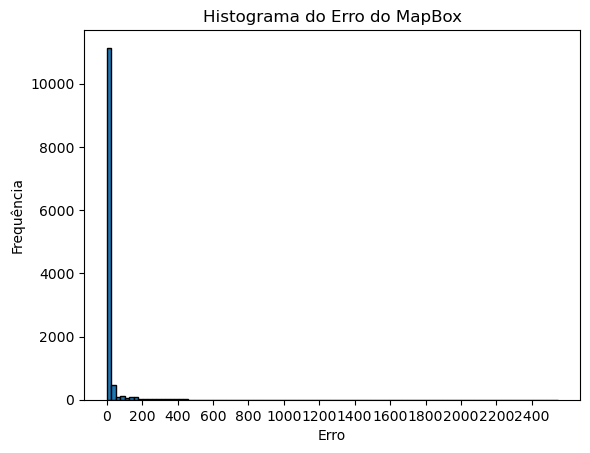

In [19]:
# Calcule os valores do erro
erro_mapbox = mapbox['erro']
erro_tomtom = tomtom['erro']
erro_google = google['erro']
erro_ors = ors['erro']

# Crie a figura e os eixos
fig, ax = plt.subplots()

# Crie o histograma
ax.hist(erro_mapbox, bins=100, edgecolor='black')
ax.set_xticks(np.arange(0, max(erro_mapbox), 200))

# Adicione rótulos e título
ax.set_xlabel('Erro')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do Erro do MapBox')
#ax.set_yscale('log')

hist_mapbox = plt.gcf()



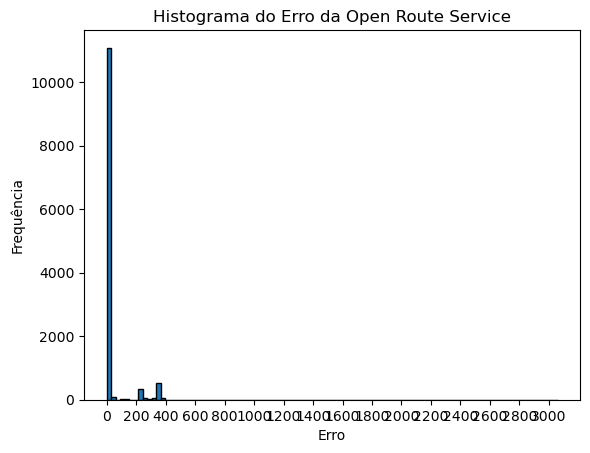

In [23]:
# Crie a figura e os eixos
fig, ax = plt.subplots()

# Crie o histograma
ax.hist(erro_ors, bins=100, edgecolor='black')
ax.set_xticks(np.arange(0, max(erro_ors), 200))

# Adicione rótulos e título
ax.set_xlabel('Erro')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do Erro da Open Route Service')

hist_erro = plt.gcf()



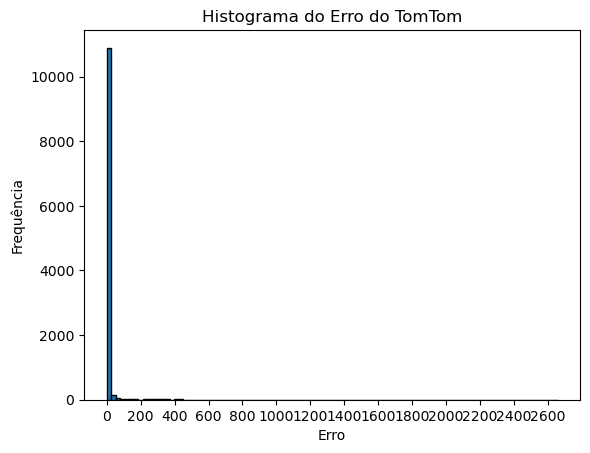

In [20]:
# Crie a figura e os eixos
fig, ax = plt.subplots()

# Crie o histograma
ax.hist(erro_tomtom, bins=100, edgecolor='black')
ax.set_xticks(np.arange(0, max(erro_tomtom), 200))

# Adicione rótulos e título
ax.set_xlabel('Erro')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do Erro do TomTom')

hist_erro = plt.gcf()

C:\Users\analu\AppData\Local\Temp\ipykernel_12120\1287198239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mapbox['erro'], bins=100, label='MapBox')
C:\Users\analu\AppData\Local\Temp\ipykernel_12120\1287198239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(google['erro'], bins=100, la

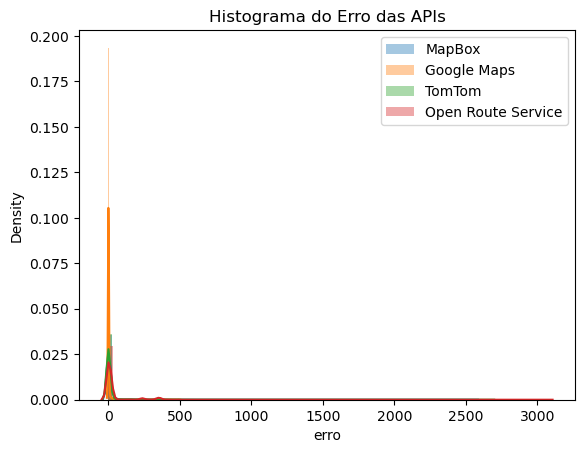

In [25]:
import seaborn as sns

limite = 50
sns.distplot(mapbox['erro'], bins=100, label='MapBox')
sns.distplot(google['erro'], bins=100, label='Google Maps')
sns.distplot(tomtom['erro'], bins=100, label='TomTom')
sns.distplot(ors['erro'], bins=100, label='Open Route Service')

plt.legend()  # Adicione uma legenda com base nos rótulos definidos acima

plt.title('Histograma do Erro das APIs')
plt.show()

C:\Users\analu\AppData\Local\Temp\ipykernel_12120\3934789394.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mapbox['erro'][mapbox['erro'] < limite], bins=100, label='MapBox')
C:\Users\analu\AppData\Local\Temp\ipykernel_12120\3934789394.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(goo

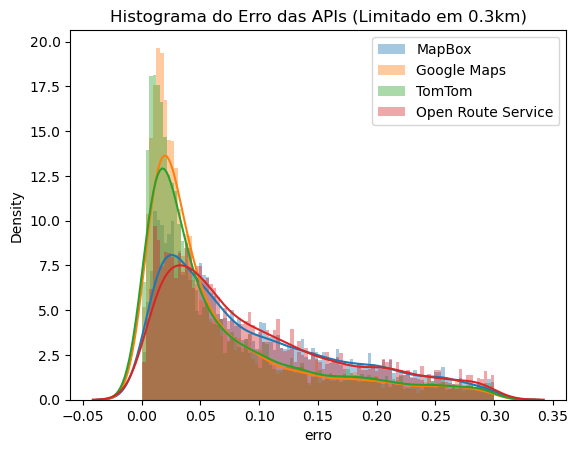

In [27]:

limite = 0.3
sns.distplot(mapbox['erro'][mapbox['erro'] < limite], bins=100, label='MapBox')
sns.distplot(google['erro'][google['erro'] < limite], bins=100, label='Google Maps')
sns.distplot(tomtom['erro'][tomtom['erro'] < limite], bins=100, label='TomTom')
sns.distplot(ors['erro'][ors['erro'] < limite], bins=100, label='Open Route Service')

plt.legend()  # Adicione uma legenda com base nos rótulos definidos acima

plt.title('Histograma do Erro das APIs (Limitado em '+str(limite)+'km)')
plt.show()